<a href="https://colab.research.google.com/github/CameronKenworthyCode/python/blob/main/contrast_auto_crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://stackoverflow.com/questions/48395434/how-to-crop-or-remove-white-background-from-an-image

https://stackoverflow.com/questions/70104395/create-a-curve-which-adjust-the-contrast-and-brightness-respectively-of-an-image

https://danielmuellerkomorowska.com/2020/06/27/contrast-adjustment-with-scikit-image/

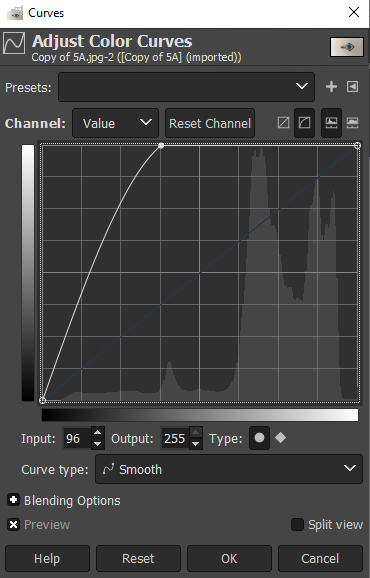

crank value curve, then run white crop

In [ ]:
import pandas as pd
import numpy as np

!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt
from skimage import io, exposure, data
from google.colab.patches import cv2_imshow # for image display
import cv2

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
gdrive = GoogleDrive(gauth)

local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

drive.mount('/content/drive/', force_remount=True)

file_list = gdrive.ListFile(
    {'q': "'1CxSrcySmKlK61gX-tdIMq90oA-eSbGoD' in parents and trashed=False"}).GetList()

Mounted at /content/drive/


In [ ]:
for file in file_list:
  if file['mimeType'] == 'image/jpeg':
    image = cv2.imread('/content/drive/MyDrive/Jewelry/catalogued/'+file['title']+'.jpg')
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray[gray>70] = 0
    x,y,w,h = cv2.boundingRect(gray)
    crop = image[y-150:y+h+100, x-150:x+w+100]
    cv2.imwrite('/content/drive/MyDrive/Jewelry/catalogued/cropped/'+file['title']+'.png', crop)
